<a href="https://colab.research.google.com/github/rames4498/computervision/blob/master/pytorch_stage0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [ ]:
import torch

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.__version__

'2.8.0+cu126'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tensors

#creating tensors

tensors r created torch.tensor()

In [ ]:
#scalar
scalar  = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.shape

torch.Size([])

In [ ]:
# a scalar has no dimension
scalar.ndim

0

In [ ]:
# get tensor back as python int
scalar.item()

7

In [ ]:
# vector
vector = torch.tensor([6,4])
vector.ndim
# it is a tensor of 1 dimension

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
matrix =  torch.tensor([[4,6,3],[3,8,5]])
matrix.ndim

2

In [ ]:
matrix[0]

tensor([4, 6, 3])

In [ ]:
matrix.shape

torch.Size([2, 3])

In [ ]:
tensor = torch.tensor([[[4,5],
                        [23,5],
                      [2,5]]
                      ,[[3,6],[4,6],[7,6]]])

In [ ]:
tensor.shape

torch.Size([2, 3, 2])

In [ ]:
tensor.ndim

3

#Random tensors

In [ ]:
random_numbers = torch.rand(2,4)
random_numbers

tensor([[0.3235, 0.7344, 0.0143, 0.4156],
        [0.9402, 0.2483, 0.4996, 0.7123]])

In [ ]:
random_numbers = torch.rand(4,2,4)
random_numbers

tensor([[[0.1005, 0.8951, 0.4294, 0.0678],
         [0.5626, 0.0344, 0.6048, 0.3999]],

        [[0.6381, 0.1841, 0.3462, 0.8147],
         [0.1911, 0.4084, 0.9267, 0.8796]],

        [[0.4961, 0.8254, 0.4630, 0.6339],
         [0.0737, 0.4697, 0.6119, 0.4864]],

        [[0.1812, 0.4029, 0.0876, 0.8048],
         [0.2612, 0.9473, 0.6489, 0.6670]]])

In [ ]:
# shape of an image
random_image_size_tensor = torch.rand(3, 244,244)
random_image_size_tensor.ndim, random_image_size_tensor.shape

(3, torch.Size([3, 244, 244]))

In [ ]:
# Example: a tensor image (C x H x W) to H W C
img = torch.rand(3, 128, 128)  # fake RGB image

# Convert to numpy and permute channels for matplotlib (H x W x C)
img_np = img.permute(1, 2, 0).numpy()

In [ ]:
img2array = random_image_size_tensor.permute(1, 2, 0).numpy()
img2array.shape, img2array.ndim

((244, 244, 3), 3)

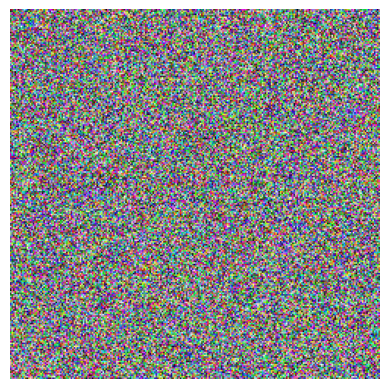

In [ ]:
plt.imshow(img2array)
plt.axis("off")
plt.show() # 3x244x244

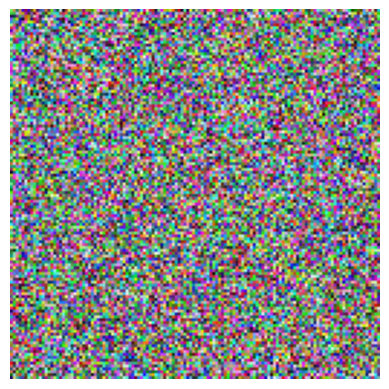

In [ ]:
plt.imshow(img_np)
plt.axis("off")
plt.show() # 3x128x128

In [ ]:
zeros = torch.zeros(size=(4,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
ones = torch.ones(size=(4,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
zeros.ndim

2

In [ ]:
zeros.shape

torch.Size([4, 3])

In [ ]:
zeros.size()

torch.Size([4, 3])

In [ ]:
arrZ = zeros.numpy()
arrZ

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [ ]:
arrO =ones.numpy()
arrO

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

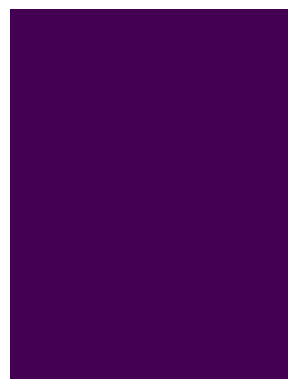

In [ ]:
plt.imshow(arrZ, cmap="viridis")
plt.axis("off")
plt.show()

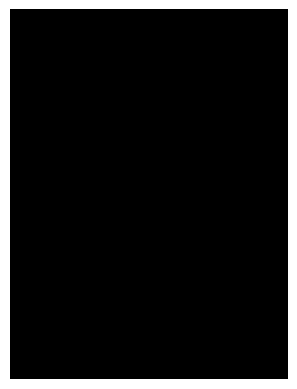

In [ ]:
plt.imshow(arrO, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
arrO

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Great question 👍 Let’s go step by step, because this is a subtle but important detail about how `matplotlib.imshow` works.

---

### 🔹 How `imshow` decides what color to show

When you call:

```python
plt.imshow(array, cmap="gray")
```

matplotlib looks at the **values inside `array`** and maps them to colors based on a **colormap** (like `"gray"`).

* `"gray"` means:

  * `0` → black
  * `1` → white
  * values in between → shades of gray

But here’s the catch 👇

If you **don’t** specify `vmin` and `vmax`, matplotlib **automatically rescales** your data so that:

* `min(array)` → mapped to black
* `max(array)` → mapped to white

---

### 🔹 Case 1: `zeros = torch.zeros((4,3))`

Your array looks like:

```
[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]
```

* Minimum value = 0
* Maximum value = 0

Since `min == max`, matplotlib has **no range to stretch values**. Everything is "stuck" at 0.
So the whole image is black.

---

### 🔹 Case 2: `ones = torch.ones((4,3))`

Your array looks like:

```
[[1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1]]
```

* Minimum value = 1
* Maximum value = 1

Again, `min == max`.
Matplotlib rescales so that "min = black, max = white". But since min=max=1, everything is the same value. It can’t distinguish shades → all pixels collapse into one color (black by default).

That’s why your **ones array also looks black**.

---

### 🔹 The Fix: Manually tell matplotlib what black & white mean

If you know your data should be interpreted in the `[0,1]` range, you must give `imshow` explicit bounds:

```python
plt.imshow(ones, cmap="gray", vmin=0, vmax=1)
```

Now matplotlib will map:

* `0 → black`
* `1 → white`

So your `zeros` array will be black, and your `ones` array will be white ✅

---

👉 Would you like me to also **show you visually with a demo plot**:

* `zeros` (black)
* `ones` (white, but only if we set `vmin/vmax`)
* and maybe a `torch.rand` array so you see the grays in between?


#tensors images

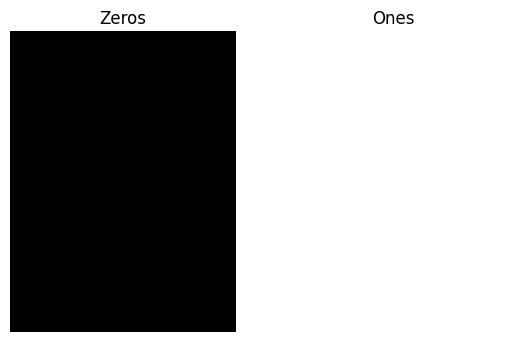

In [ ]:
import torch
import matplotlib.pyplot as plt

zeros = torch.zeros(size=(4,3)).numpy()
ones = torch.ones(size=(4,3)).numpy()

fig, axs = plt.subplots(1, 2)

axs[0].imshow(zeros, cmap="gray", vmin=0, vmax=1)
axs[0].set_title("Zeros")
axs[0].axis("off")

axs[1].imshow(ones, cmap="gray", vmin=0, vmax=1)
axs[1].set_title("Ones")
axs[1].axis("off")

plt.show()
